<a href="https://colab.research.google.com/github/Jerry086/SALSA/blob/main/Colab/Audio_Embeddings_Similarity_Threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install faiss-cpu

import faiss

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 30.3 MB/s eta 0:00:00


In [3]:
import pandas as pd

metadata = pd.read_csv('/content/drive/MyDrive/audioset/test_metadata_rootclass.csv')
embeddings = pd.read_csv('/content/drive/MyDrive/audioset/test_embeddings_meanpool.csv')

merged_df = pd.merge(metadata, embeddings, on='video_id')

# print(metadata.head())
# print(embeddings.head())
merged_df

,video_id,start_time_seconds,end_time_seconds,labels,root_classes,feature_0,feature_1,feature_2,feature_3,feature_4,...,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127
0,iZcPr3wgJCw,30.0,40.0,['Engine knocking'],['Engine'],64.9,221.3,85.4,7.4,215.8,...,124.0,191.2,144.8,65.8,87.1,153.0,112.2,216.3,187.1,173.0
1,iZmn0dUXP9E,40.0,50.0,"['Toothbrush', 'Electric toothbrush']","['Domestic sounds, home sounds']",93.7,112.2,100.1,20.7,166.8,...,54.9,181.4,106.5,192.7,50.5,67.4,95.2,123.9,190.5,132.4
2,iZ2K_GPtc6g,30.0,40.0,"['Sine wave', 'Chirp tone']",['Other sourceless'],170.6,72.8,107.5,83.9,118.0,...,96.5,204.1,215.9,80.7,77.4,20.7,80.1,190.3,42.6,146.3
3,iZtF1lUPbEQ,20.0,30.0,"['Fart', 'Buzz', 'Music']","['Wild animals', 'Digestive', 'Music', 'Onomat...",170.6,118.4,102.6,128.2,134.6,...,120.7,27.1,137.5,150.0,90.3,94.5,100.1,136.5,156.4,119.3
4,iZFRfh1Wjt8,420.0,430.0,"['Vehicle', 'Vehicle horn, car horn, honking',...","['Alarm', 'Vehicle']",73.9,166.3,82.6,17.5,230.2,...,91.4,149.5,149.7,134.8,124.3,62.7,146.1,166.0,52.4,85.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21777,2Cmn2lplGfc,30.0,40.0,"['Propeller, airscrew']",['Vehicle'],59.7,189.7,13.3,18.3,179.3,...,255.0,214.7,253.7,112.6,123.7,90.4,110.9,138.4,58.5,113.1
21778,2ClQcAd-wJg,30.0,40.0,"['Speech', 'Buzzer']","['Alarm', 'Human voice']",55.0,147.8,237.5,223.2,126.1,...,65.6,122.0,178.2,192.2,198.1,175.9,237.6,61.6,182.2,153.4
21779,-Sclnq22t7o,30.0,40.0,"['Burping, eructation']",['Digestive'],82.0,77.8,171.4,86.6,112.6,...,147.6,129.8,32.3,148.6,101.8,54.0,85.2,107.8,183.9,112.1
21780,-SD9DkKyOrY,30.0,40.0,"['Percussion', 'Drum kit', 'Drum', 'Snare drum...",['Music'],180.4,107.9,81.7,80.9,99.4,...,42.1,33.7,0.7,233.8,150.8,93.2,255.0,128.7,137.1,230.7


In [4]:
import numpy as np
features = merged_df.drop(columns=['video_id', 'start_time_seconds', 'end_time_seconds', 'labels', 'root_classes']).values
features.astype(np.float32)
features.shape

(21782, 128)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree

kd_tree = KDTree(features, leaf_size=40, metric='euclidean')

# Query the KDTree for the four nearest points to each point
distances, indices = kd_tree.query(features, k=16)

fifth_nearest_distances = distances[:, 5]  # fifth Nearest neighbor (excluding the point itself)
tenth_nearest_distances = distances[:, 10]  # tenth nearest neighbor
fifteenth_nearest_distances = distances[:, 15]  # fifteenth nearest neighbor

print("Distances to the nearest neighbor for each point:", fifth_nearest_distances)
print("Distances to the second nearest neighbor for each point:", tenth_nearest_distances)
print("Distances to the third nearest neighbor for each point:", fifteenth_nearest_distances)

fifth_nearest_indices = indices[:, 5]
tenth_nearest_indices = indices[:, 10]
fifteenth_nearest_indices = indices[:, 15]

print("Indices of nearest neighbors for each point:", fifth_nearest_indices)
print("Indices of second nearest neighbors for each point:", tenth_nearest_indices)
print("Indices of third nearest neighbors for each point:", fifteenth_nearest_indices)

Distances to the nearest neighbor for each point: [712.45097375 449.1385087  426.75373461 ... 380.39697685 476.32150907
 511.80606679]
Distances to the second nearest neighbor for each point: [743.51923983 467.42057079 476.53432195 ... 396.75767163 566.37060305
 530.813828  ]
Distances to the third nearest neighbor for each point: [755.00017219 479.71174678 489.13566625 ... 400.5134205  602.82669151
 541.65257315]
Indices of nearest neighbors for each point: [12101 14603  6895 ... 12239  5383  1209]
Indices of second nearest neighbors for each point: [ 5053 14615  6706 ...   517  6757 18165]
Indices of third nearest neighbors for each point: [5712 5177  156 ... 5328  477 4015]


In [6]:
# initialize Faiss index

DIMENSION = 128
index = faiss.IndexFlatL2(DIMENSION)
index.add(features)

# Search for the 4 nearest neighbors (including the point itself)
distances, indices = index.search(features, 16)
fifth_nearest_distances = distances[:, 5]
tenth__nearest_distances = distances[:, 10]
fifteenth_nearest_distances = distances[:, 15]

print("Nearest distances for each point:", fifth_nearest_distances)
print("Second nearest distances for each point:", tenth__nearest_distances)
print("Third nearest distances for each point:", fifteenth_nearest_distances)

fifth_nearest_indices = indices[:, 5]
tenth_nearest_indices = indices[:, 10]
fifteenth_nearest_indices = indices[:, 15]

print("Indices of nearest neighbors for each point:", fifth_nearest_indices)
print("Indices of second nearest neighbors for each point:", tenth_nearest_indices)
print("Indices of third nearest neighbors for each point:", fifteenth_nearest_indices)

Nearest distances for each point: [507584.5 201726.  182120.5 ... 144702.5 226882.  261945.5]
Second nearest distances for each point: [552821.5 218481.  227086.  ... 157417.5 320774.5 281763.5]
Third nearest distances for each point: [570025.5 230122.5 239253.  ... 160411.5 363401.5 293388. ]
Indices of nearest neighbors for each point: [12101 14603  6895 ... 12239  5383  1209]
Indices of second nearest neighbors for each point: [ 5053 14615  6706 ...   517  6757 18165]
Indices of third nearest neighbors for each point: [5712 5177  156 ... 5328  477 4015]


In [8]:
import numpy as np

# Calculate the 80th percentile of each distances
first_limit = np.percentile(fifth_nearest_distances, 90)
second_limit = np.percentile(tenth__nearest_distances, 90)
third_limit = np.percentile(fifteenth_nearest_distances, 90)

print(first_limit)
print(second_limit)
print(third_limit)

357719.5250000001
395849.3
421536.2


In [9]:
# Function to count points within a given percentile distance
def count_within_percentile_radius(index, features, percentile_distance):
    counts = []
    for i in range(features.shape[0]):
        # Square the percentile distance for L2 metric in Faiss
        D, I, lims = index.range_search(features[i:i+1], percentile_distance)
        # Subtract 1 to exclude the point itself
        if lims.size > 1:
            count = lims[1] - lims[0] - 1
        else:
            count = 0
        counts.append(count)
    return counts

counts_first = count_within_percentile_radius(index, features, first_limit)
counts_second = count_within_percentile_radius(index, features, second_limit)
counts_third = count_within_percentile_radius(index, features, third_limit)

In [ ]:
# print(counts_second)

In [10]:
res_1 = 0
for num in counts_first:
  if num == 0:
    res_1 += 1
print(res_1)

res_2 = 0
for num in counts_second:
  if num == 0:
    res_2 += 1
print(res_2)

res_3 = 0
for num in counts_third:
  if num == 0:
    res_3 += 1
print(res_3)

1225
1209
1435


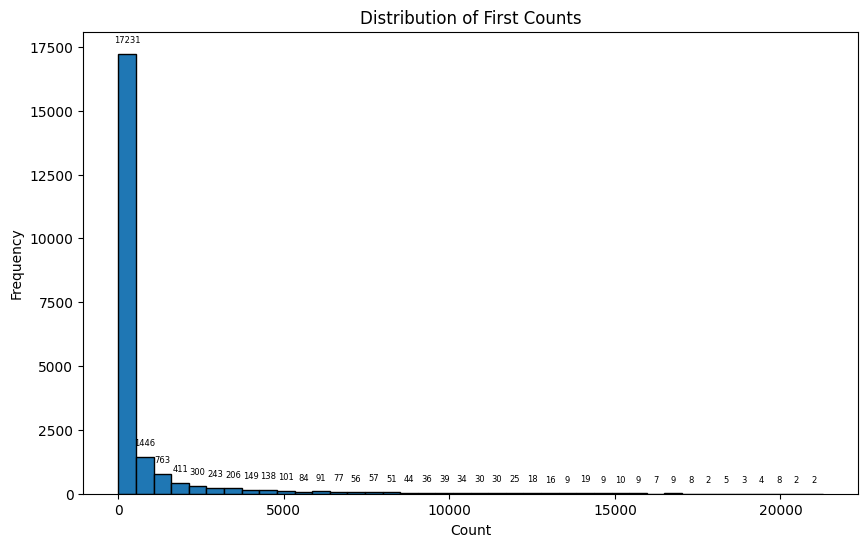

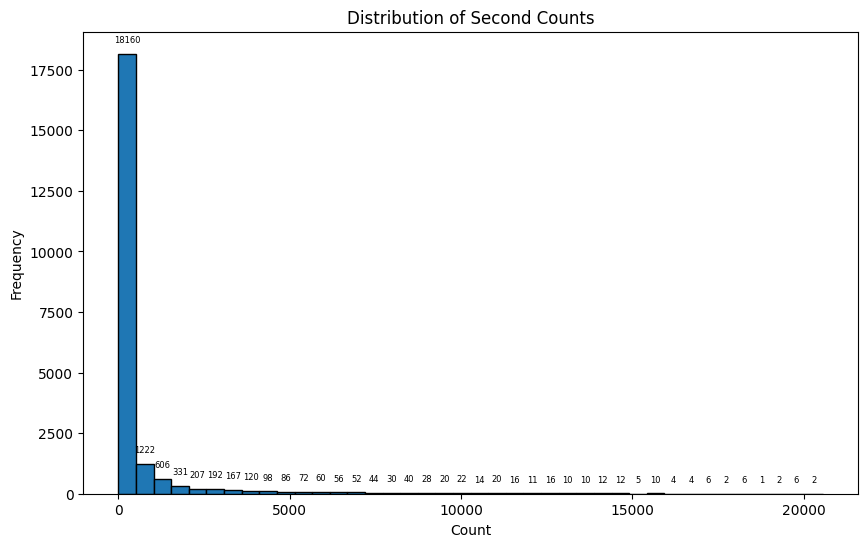

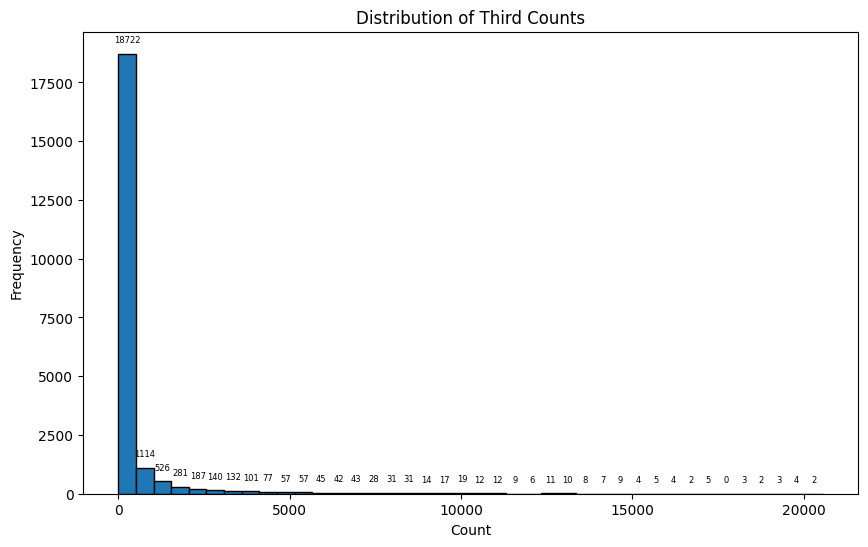

In [11]:
import matplotlib.pyplot as plt

# Function to plot histogram and annotate bars
def plot_histogram(counts, title):
    plt.figure(figsize=(10, 6))
    counts, bins, patches = plt.hist(counts, bins=40, edgecolor='black')
    for p in patches:  # Annotate each bar
        plt.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10),
                     textcoords='offset points', fontsize=6)
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    plt.show()

# Plot each histogram separately
plot_histogram(counts_first, 'Distribution of First Counts')
plot_histogram(counts_second, 'Distribution of Second Counts')
plot_histogram(counts_third, 'Distribution of Third Counts')


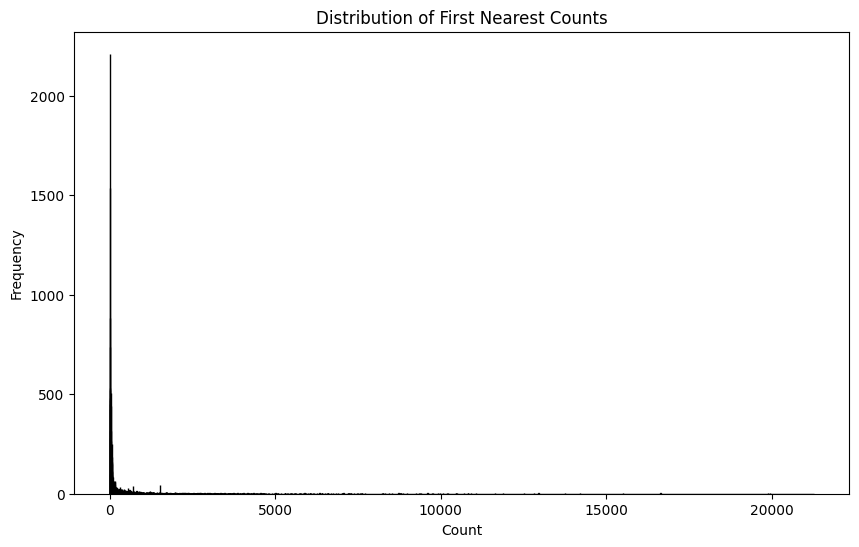

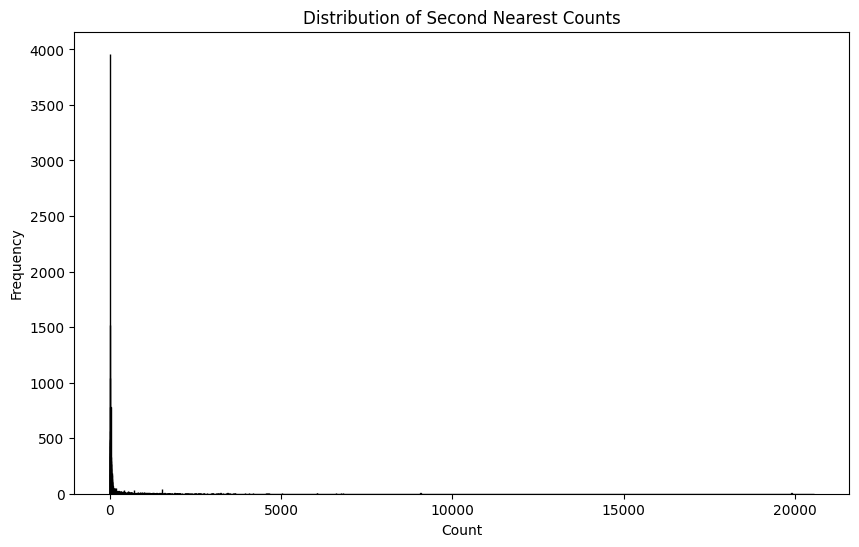

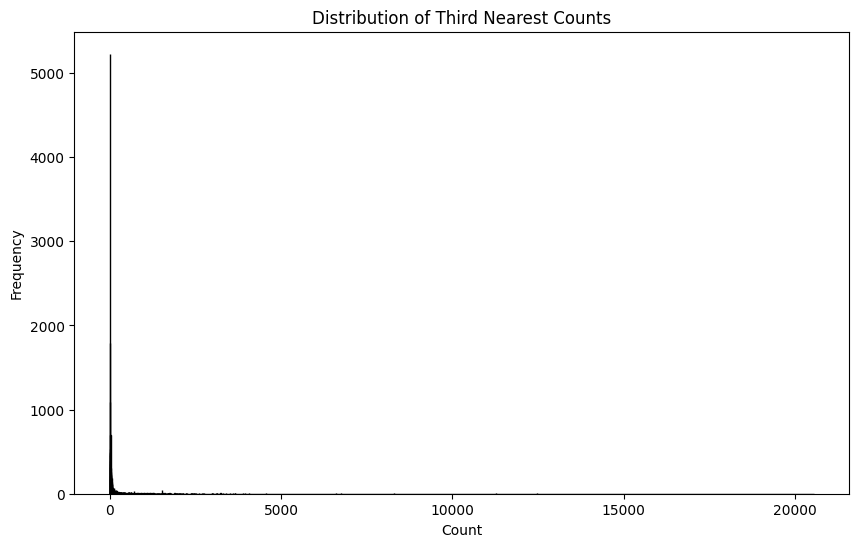

In [12]:
import matplotlib.pyplot as plt

# Function to plot histogram and annotate bars
def plot_histogram(counts, title):
    plt.figure(figsize=(10, 6))
    counts, bins, patches = plt.hist(counts, bins=10000, edgecolor='black')
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    plt.show()

# Plot each histogram separately
plot_histogram(counts_first, 'Distribution of First Nearest Counts')
plot_histogram(counts_second, 'Distribution of Second Nearest Counts')
plot_histogram(counts_third, 'Distribution of Third Nearest Counts')

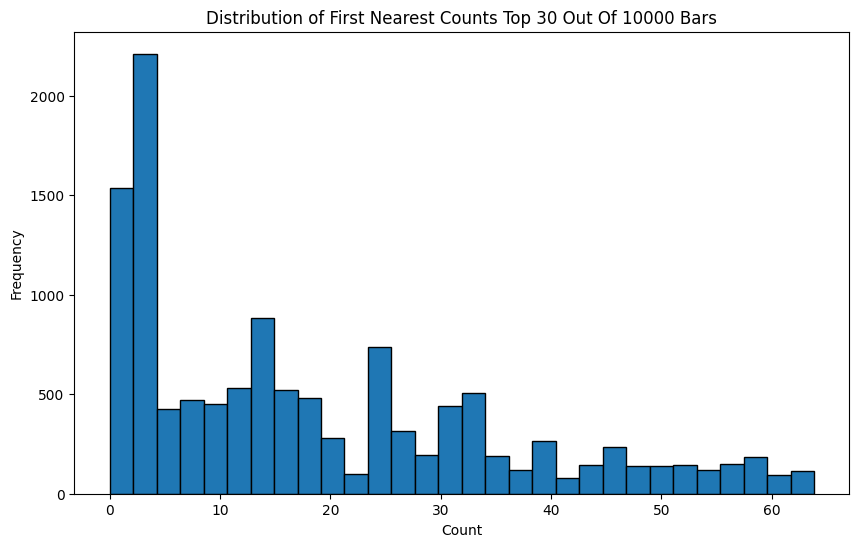

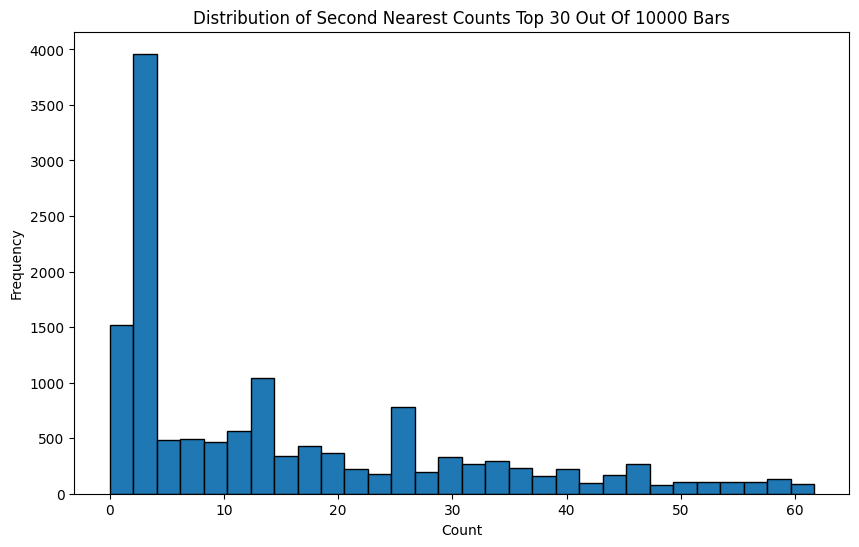

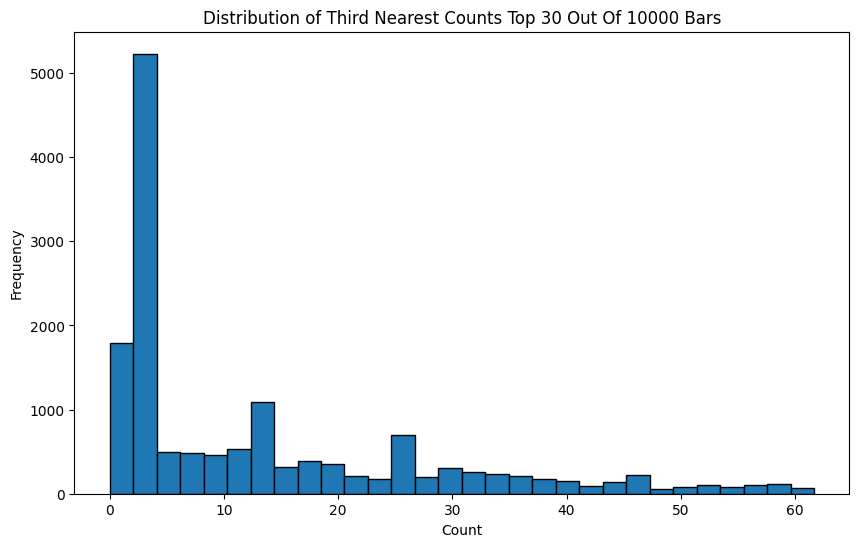

In [13]:
import matplotlib.pyplot as plt

# Function to plot histogram and annotate bars
def plot_histogram(counts, title):
    plt.figure(figsize=(10, 6))
    # Calculate the bin edges for 10000 bins and then select the range for the first 30 bins
    bin_edges = np.linspace(min(counts), max(counts), 10001)  # 10000 bins means 10001 edges
    selected_bins = bin_edges[:31]  # Get the edges for the first 30 bins

    # Plot the histogram using the selected bins
    plt.hist(counts, bins=selected_bins, edgecolor='black')
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    plt.show()

# Plot each histogram separately
plot_histogram(counts_first, 'Distribution of First Nearest Counts Top 30 Out Of 10000 Bars')
plot_histogram(counts_second, 'Distribution of Second Nearest Counts Top 30 Out Of 10000 Bars')
plot_histogram(counts_third, 'Distribution of Third Nearest Counts Top 30 Out Of 10000 Bars')